## Temporal analysis

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from etl import Data
from pprint import pprint
data = Data()
data.df

,Transaction_id,Transaction_date,ac_name,ac_location,ac_registration_number,ac_name_of_group,mc_name,mc_location,mc_registration_number
0,1,2013-04-26,Immobilaire Effetti S.R.L.,Belgium,12326610156,Immobilaire Effetti S.R.L.,Luforden B.V.,Finland,12326610156
1,1,2013-04-26,Immobilaire Effetti S.R.L.,Italy,12326610156,Immobilaire Effetti S.R.L.,Luforden B.V.,Finland,12326610156
2,1,2013-04-26,Immobilaire Effetti S.R.L.,Belgium,12326610156,Immobilaire Effetti S.R.L.,Luforden B.V.,Netherlands,12326610156
3,1,2013-04-26,Immobilaire Effetti S.R.L.,Italy,12326610156,Immobilaire Effetti S.R.L.,Luforden B.V.,Netherlands,12326610156
4,2,2017-10-24,ABN AMRO Commercial Finance Holding B.V.,Belgium,24263820,ABN AMRO Commercial Finance Holding B.V.,ABN AMRO Commercial Finance Plc,Sweden,24263820
5,2,2017-10-24,ABN AMRO Commercial Finance Holding B.V.,Netherlands,24263820,ABN AMRO Commercial Finance Holding B.V.,ABN AMRO Commercial Finance Plc,Sweden,24263820
6,2,2017-10-24,ABN AMRO Commercial Finance Holding B.V.,Belgium,24263820,ABN AMRO Commercial Finance Holding B.V.,ABN AMRO Commercial Finance Plc,United Kingdom,24263820
7,2,2017-10-24,ABN AMRO Commercial Finance Holding B.V.,Netherlands,24263820,ABN AMRO Commercial Finance Holding B.V.,ABN AMRO Commercial Finance Plc,United Kingdom,24263820
8,3,2013-05-14,Pathé Holding B.V.,Netherlands,324286826,Les Cin Mas Gaumont Path S.A.S.,Chargetex 28 S.A.S,Finland,324286826
9,3,2013-05-14,Pathé Holding B.V.,Sweden,324286826,Les Cin Mas Gaumont Path S.A.S.,Chargetex 28 S.A.S,Finland,324286826


In [ ]:
data.df

In [7]:
# constructing a network between some dates
data.cbcm2graph(start_date=datetime(2009, 12, 5), end_date=datetime(2011, 1, 5))
pprint(data.graph.edges.data())  

OutEdgeDataView([('Belgium', 'Sweden', {'weight': 2}), ('Belgium', 'Ireland', {'weight': 1}), ('Netherlands', 'Sweden', {'weight': 2}), ('Sweden', 'Netherlands', {'weight': 2}), ('Sweden', 'Germany', {'weight': 1}), ('Sweden', 'Finland', {'weight': 1}), ('Sweden', 'Spain', {'weight': 1}), ('Sweden', 'Denmark', {'weight': 2}), ('Germany', 'Ireland', {'weight': 1}), ('Luxembourg', 'Ireland', {'weight': 1}), ('Norway', 'Sweden', {'weight': 2}), ('Finland', 'Netherlands', {'weight': 1}), ('Finland', 'Sweden', {'weight': 1}), ('Finland', 'Germany', {'weight': 1}), ('Finland', 'Norway', {'weight': 1}), ('Finland', 'Denmark', {'weight': 1}), ('Denmark', 'Sweden', {'weight': 4}), ('Czech Republic', 'Slovakia', {'weight': 2}), ('Austria', 'Sweden', {'weight': 1}), ('Austria', 'United Kingdom', {'weight': 1}), ('United Kingdom', 'Ireland', {'weight': 1}), ('Ireland', 'Germany', {'weight': 2}), ('Ireland', 'United Kingdom', {'weight': 1})])


In [8]:
data()
for df in data.scores:
    print(df.head())

             DEG        PR       PRW
Finland        1  0.046424  0.046424
Belgium        0  0.025094  0.025094
Singapore      0  0.025094  0.025094
Switzerland    0  0.025094  0.025094
Poland         0  0.025094  0.025094
                DEG        PR       PRW
Norway            2  0.073642  0.071164
Cyprus            2  0.054592  0.054536
Finland           5  0.045271  0.046426
Czech Republic    2  0.039259  0.039219
Iceland           1  0.034048  0.034354
         DEG        PR       PRW
Sweden     8  0.156414  0.154257
Denmark    3  0.082715  0.089194
Germany    1  0.060812  0.060125
Italy      1  0.060812  0.060125
Finland    5  0.051538  0.051300
                DEG        PR       PRW
Ireland           6  0.229989  0.222437
Germany           4  0.128648  0.154920
Sweden           10  0.083902  0.093676
United Kingdom    3  0.113108  0.078233
Netherlands       3  0.030894  0.044786
                DEG        PR       PRW
Sweden           12  0.079613  0.081542
Czech Republic    2 

In [6]:
# countries Page-Rank Weighted every year
import pprint

years = []
blacklist = []

for country in countries:
    if country not in ['Germany','Netherlands','Luxembourg','Finland','Sweden','Norway','United Kingdom','Italy','Denmark','Ireland']:
        blacklist.append(country)

for y in range(2008,2019):
    import networkx as nx
    G = nx.DiGraph() #change to MultiDiGraph
    for node in countries:
        G.add_node(node)

    start_date = datetime(y, 1, 1)
    end_date = datetime(y+1, 1, 1)
    G = pumba(G,df, start_date=start_date, end_date=end_date)
    #pprint.pprint(G.edges.data())

    import pprint
    dfy = pd.DataFrame.from_dict(dict(nx.pagerank(G,weight='weight')), orient = 'index', columns=[y])
    years.append(dfy)
    
G = pumba(G,df, start_date=datetime(2008,1,1), end_date=datetime(2019,1,1))
dfy = pd.DataFrame.from_dict(dict(nx.pagerank(G,weight='weight')), orient = 'index', columns=['ALL'])
years.append(dfy)
df_all = pd.concat(years, axis = 1)
df_all = df_all.sort_values(by='ALL',axis='index', ascending =False)
for b in blacklist:
    df_all = df_all.drop(b)
#df_all = df_all.sort_values(by='PRW',axis='index', ascending =False)
#print(y, '\n', df_all.head(), '\n')
df_all*100


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,ALL
Netherlands,3.435391,1.641584,4.478647,4.262182,1.533502,16.713086,19.727149,13.190678,10.037942,10.927808,9.966655,13.977038
Germany,2.840719,6.012464,15.492002,2.886274,2.883329,10.565971,11.797513,8.754727,15.663716,16.306101,16.175579,12.800536
Luxembourg,2.119955,2.304376,1.066946,3.340802,4.337941,6.947317,14.348806,7.250546,10.892966,19.919156,16.245415,12.794029
Sweden,2.119955,15.425747,9.367570,8.154196,16.631494,8.666781,3.703934,6.084955,2.537246,4.034239,6.025137,6.438906
Italy,2.119955,6.012464,1.066946,4.001489,1.950728,5.449623,6.490268,7.194451,7.432495,3.581801,4.438587,5.713893
Finland,4.642629,5.129995,1.066946,4.079393,9.776445,6.059998,3.097493,5.633200,3.888612,3.605953,2.848352,4.964874
United Kingdom,2.119955,1.641584,7.823320,2.256175,5.742728,3.874140,3.384304,2.466674,5.102365,2.934032,6.897209,4.077492
Denmark,2.119955,8.919417,2.659434,2.886274,6.417435,2.208573,1.516745,1.761563,2.291944,2.456818,2.820315,2.134018
Ireland,2.119955,2.339266,22.243683,3.792535,3.436049,1.108755,1.857215,1.610036,1.048093,1.549176,1.398573,1.919868
Norway,7.116418,1.641584,1.293672,2.256175,5.997248,2.715674,1.038146,3.045838,1.782121,1.869311,0.714270,1.821245


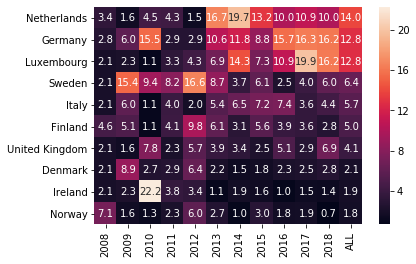

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_all*100, annot=True, fmt=".1f")
#sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

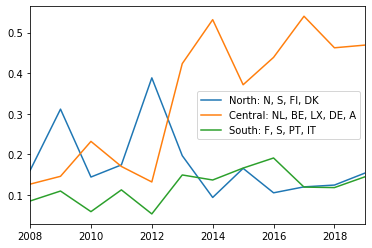

In [97]:
df1 = df_all.filter(items=['Norway','Finland','Sweden','Denmark'], axis='index').agg(['sum']).rename(index={'sum':'North: N, S, FI, DK'})
df2 = df_all.filter(items=['Netherlands','Germany','Luxembourg','Belgium','Austria'], axis='index').agg(['sum']).rename(index={'sum':'Central: NL, BE, LX, DE, A'})
df3 = df_all.filter(items=['Spain','Italy','France','Portugal'], axis='index').agg(['sum']).rename(index={'sum':'South: F, S, PT, IT'})
df_eu = pd.concat([df1, df2, df3])
df_eu.transpose().plot.line()

In [8]:
import pprint
from datetime import datetime

all_years_centralities = []
years = []
ser = []
eu_temporal = {country:None for country in countries}
d = {y:0 for y in range(2013,2019)}

for country in ['Germany','Luxembourg','Finland']:
    for y in range(2013,2019):
        import networkx as nx
        G = nx.DiGraph() #change to MultiDiGraph
        for node in countries:
            G.add_node(node)

        start_date = datetime(y, 1, 1)
        end_date = datetime(y+1, 1, 1)
        G = pumba(G,df, start_date=start_date, end_date=end_date)
        #pprint.pprint(G.edges.data())

        import pprint
        df0 = pd.DataFrame.from_dict(dict(G.degree()), orient = 'index', columns=['DEG'])
        df1 = pd.DataFrame.from_dict(dict(nx.pagerank(G, weight=0)), orient = 'index', columns=['PR'])
        df2 = pd.DataFrame.from_dict(dict(nx.pagerank(G, weight='weight')), orient = 'index', columns=['PRW'])
        df_all = pd.concat([df0, df1, df2], axis = 1)
        df_all = df_all.loc[country,:]
        d[y] = df_all

        all_years_centralities.append(df_all)
    eu_temporal[country]=d
    print(country,'\n', pd.DataFrame.from_dict(d), '\n')

Germany 
           2013       2014       2015       2016       2017       2018
DEG  37.000000  25.000000  23.000000  29.000000  33.000000  16.000000
PR    0.081863   0.067655   0.070237   0.099900   0.084859   0.083637
PRW   0.105660   0.117975   0.087547   0.156637   0.163061   0.161756 

Luxembourg 
           2013       2014       2015       2016       2017       2018
DEG  22.000000  17.000000  16.000000  18.000000  28.000000  16.000000
PR    0.054747   0.068750   0.046496   0.046801   0.077733   0.081002
PRW   0.069473   0.143488   0.072505   0.108930   0.199192   0.162454 

Finland 
           2013      2014       2015       2016      2017      2018
DEG  30.000000  7.000000  14.000000  15.000000  10.00000  4.000000
PR    0.070477  0.039214   0.061472   0.063076   0.04803  0.026038
PRW   0.060600  0.030975   0.056332   0.038886   0.03606  0.028484 



In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.DataFrame.from_dict(eu_temporal['Luxembourg']).drop('#'), annot=True, fmt=".2f")
#sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

KeyError: "['#'] not found in axis"

In [19]:
for i in range(0,13):
    print(i+2006, all_years_centralities[i].head(), '\n')

2006              # connections  Degree  IN degree  OUT degree  Page Rank
Belgium                  0     0.0        0.0         0.0   0.025641
Singapore                0     0.0        0.0         0.0   0.025641
Switzerland              0     0.0        0.0         0.0   0.025641
Poland                   0     0.0        0.0         0.0   0.025641
Slovakia                 0     0.0        0.0         0.0   0.025641 

2007            # connections    Degree  IN degree  OUT degree  Page Rank
Finland                1  0.026316   0.026316    0.000000   0.046424
Denmark                1  0.026316   0.000000    0.026316   0.025094
Belgium                0  0.000000   0.000000    0.000000   0.025094
Singapore              0  0.000000   0.000000    0.000000   0.025094
Poland                 0  0.000000   0.000000    0.000000   0.025094 

2008                 # connections    Degree  IN degree  OUT degree  Page Rank
Finland                     5  0.131579   0.052632    0.078947   0.046426
Swede

In [9]:
pd.DataFrame.from_dict(dict(G.degree()), orient = 'index', columns=['# connections'])
G.edges(['Belgium'])

OutEdgeDataView([('Belgium', 'Netherlands'), ('Belgium', 'France'), ('Belgium', 'United Kingdom')])

In [3]:
# method 2 populate edges (one per country-country)
from datetime import datetime

# create a dictionary containing edges and their data
t_date = []
t_from = []
t_to = []
country_links = {country:{country:0 for country in countries} for country in countries}
country_links
done_transactions = []
for row_id in df.index:
    n1 = df.at[row_id, 'mc_location']
    n2 = df.at[row_id, 'ac_location']
    transaction_id = df.at[row_id, 'Transaction_id']
    transaction_date = df.at[row_id, 'Transaction_date']
    if [n1,n2,transaction_id] not in done_transactions:
        done_transactions.append([n1,n2,transaction_id])
        country_links[n1][n2]+=1
        t_date.append(datetime.strptime(transaction_date, '%Y-%m-%d'))
        t_from.append(n1)
        t_to.append(n2)
    else:
        continue

# populate edges from a dictionary
for n1 in country_links:
    for n2 in country_links[n1]:
        weight = country_links[n1][n2]
        if weight>0:
            G.add_edge(n1, n2, weight = weight)

import pickle
transactions = [t_date, t_from, t_to]
pickle.dump([G, countries, transactions], open('/home/op/kernel/thesis/data/cbm/graph.pickle','wb'))            
       


338


In [4]:
# create dataframe of in and out connections
df_in = pd.DataFrame.from_dict(dict(G.in_degree()), orient='index',columns=['in'])
df_out = pd.DataFrame.from_dict(dict(G.out_degree()), orient='index',columns=['out'])
df_countries = pd.concat([
                        pd.DataFrame.from_dict(dict(G.degree()), orient='index',columns=['degree']),
                        pd.DataFrame.from_dict(dict(G.in_degree()), orient='index',columns=['in']), 
                        pd.DataFrame.from_dict(dict(G.out_degree()), orient='index',columns=['out']),
                         ], axis=1, join='outer')
df_countries = df_countries.sort_values(by='degree',axis='index', ascending =False)
df_countries
#df = pd.DataFrame(df_countries['in']+df_countries['out']).rename(columns={0:'#transactions'})
#df.sort_values(by='#transactions', axis='index', ascending =False)

,degree,in,out
Netherlands,52,25,27
Germany,49,22,27
Italy,45,21,24
Sweden,40,20,20
Austria,40,20,20
Finland,38,23,15
Luxembourg,36,20,16
United Kingdom,33,18,15
France,31,18,13
Czech Republic,26,13,13


In [17]:
for edge in G.in_edges('Ukraine', data=True):
    print(edge)

('Italy', 'Ukraine', {'weight': 1})


In [89]:
# compute various centralities
methods = {'Page Rank': nx.pagerank, 
           'Degree':nx.degree_centrality, 
           'IN degree':nx.in_degree_centrality, 
           'OUT degree':nx.out_degree_centrality,
          'eigenvector_centrality':nx.eigenvector_centrality,
            #'katz_centrality':nx.katz_centrality
           'closeness_centrality':nx.closeness_centrality,
           #'current_flow_closeness_centrality':nx.current_flow_closeness_centrality,
           'betweenness_centrality':nx.betweenness_centrality,
           'harmonic_centrality':nx.harmonic_centrality,
           #'voterank':nx.voterank           
          }
series_dict = {method_name:methods[method_name](G) for method_name in methods.keys()}
df_scores = pd.DataFrame(series_dict).sort_values(by='Page Rank',axis='index', ascending =False)
df_scores

,Page Rank,Degree,IN degree,OUT degree,eigenvector_centrality,closeness_centrality,betweenness_centrality,harmonic_centrality
Netherlands,0.139750,1.368421,0.657895,0.710526,3.090759e-01,0.682331,0.119798,28.500000
Germany,0.127979,1.289474,0.578947,0.710526,3.009997e-01,0.636842,0.085853,27.000000
Luxembourg,0.127917,0.947368,0.526316,0.421053,2.625473e-01,0.622998,0.072346,26.500000
Sweden,0.064344,1.052632,0.526316,0.526316,2.702254e-01,0.597039,0.051868,25.833333
Italy,0.057125,1.184211,0.552632,0.631579,2.578859e-01,0.636842,0.163379,27.000000
Finland,0.049833,1.000000,0.605263,0.394737,2.749374e-01,0.651316,0.050669,27.833333
Austria,0.047312,1.052632,0.526316,0.526316,2.550112e-01,0.622998,0.085096,26.500000
France,0.041624,0.815789,0.473684,0.342105,2.345455e-01,0.597039,0.039294,25.500000
United Kingdom,0.040767,0.868421,0.473684,0.394737,2.756388e-01,0.584855,0.006793,25.000000
Spain,0.040186,0.684211,0.473684,0.210526,2.485064e-01,0.597039,0.007665,25.500000


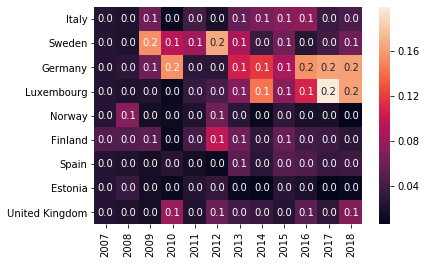

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_all, annot=True, fmt=".1f")
#sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [90]:
df_scores.profile_report()

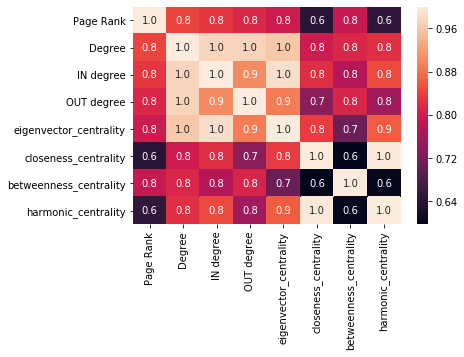

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_scores.corr(method='pearson'), annot=True, fmt=".1f")
#sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [1]:
sum([4.99,
4.99,
1.39,
17.30,
7.61])

36.28

In [116]:
df = pd.read_csv(dir_data + name_csv)
# Undirected graph (for plotting)

# initiatie graph with nodes
import networkx as nx
G = nx.Graph() #change to MultiDiGraph
for node in locs:
    G.add_node(node)

country_links = {loc:{loc:0 for loc in locs} for loc in locs}
country_links
done_transactions = []df = pd.read_csv(dir_data + name_csv)d, 'Transaction_date']
    if [n1,n2,transaction_id] not in done_transactions:
        done_transactions.append([n1,n2,transaction_id])
        country_links[n1][n2]+=1
    else:
        continue
for n1 in country_links:
    for n2 in country_links[n1]:
        weight = country_links[n1][n2]
        if weight>0:
            G.add_edge(n1, n2, weight = weight)

In [48]:
def see(something):
    if type(something)==list:
        print(len(something), len(something[0]))
    else:
   v     print(type(len))
        print('Not a list')

In [181]:
import requests, json

res = requests.get('https://oec.world/hs07/import/2015/bel/all/show/')
print(res)
d = json.loads(res.text)
print(d['data'])

<Response [200]>
[]


In [129]:
d['data']

[{'export_rca': 2.335,
  'export_val': 390705677.85,
  'export_val_growth_pct': -0.021,
  'export_val_growth_pct_5': 0.045,
  'export_val_growth_val': -8436362.36,
  'export_val_growth_val_5': 76791208.36,
  'hs92_id': '010101',
  'hs92_id_len': 6.0,
  'import_rca': 0.955,
  'import_val': 250126447.06,
  'import_val_growth_pct': 0.028,
  'import_val_growth_pct_5': -0.046,
  'import_val_growth_val': 6858769.34,
  'import_val_growth_val_5': -67199219.38,
  'origin_id': 'nausa',
  'year': 2010.0},
 {'export_rca': 2.284,
  'export_val': 201413947.08,
  'export_val_growth_pct': -0.071,
  'export_val_growth_pct_5': 0.001,
  'export_val_growth_val': -15485573.07,
  'export_val_growth_val_5': 1013855.32,
  'hs92_id': '01010111',
  'hs92_id_len': 8.0,
  'import_rca': 0.181,
  'import_val': 24912193.67,
  'import_val_growth_pct': -0.387,
  'import_val_growth_pct_5': -0.107,
  'import_val_growth_val': -15704026.59,
  'import_val_growth_val_5': -18950600.04,
  'origin_id': 'nausa',
  'year': 2010.

# Adding HCI data

In [45]:
#countries_from_cbm = list(p.keys())
countries_from_cbm = ['Belgium', 'Italy', 'Netherlands', 'Sweden', 'Germany', 'Luxembourg', 'Norway', 'Finland', 'Spain', 'France', 'Iceland', 'Estonia', 'Denmark']

print(countries_from_cbm)

['Belgium', 'Italy', 'Netherlands', 'Sweden', 'Germany', 'Luxembourg', 'Norway', 'Finland', 'Spain', 'France', 'Iceland', 'Estonia', 'Denmark']


Netherlands


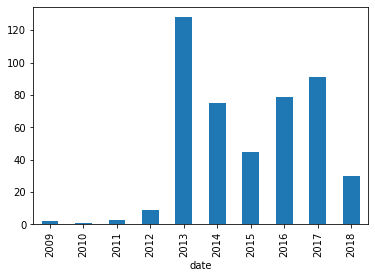

In [80]:
t_df = pd.DataFrame({'date':pd.Series(t_date), 'from':pd.Series(t_from),'to':pd.Series(t_to)})
t_df.sort_values(axis='index',by='date')
#print(t_df.head())
print('Netherlands')
t_df[t_df["from"]=='Netherlands']["date"].groupby([t_df["date"].dt.year]).count().plot(kind="bar")

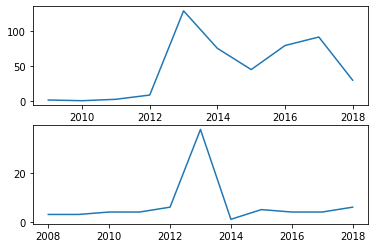

In [54]:
fig, axs = plt.subplots(2)
counter = 0
for country in ['Netherlands','Finland']:
    data = t_df[t_df["from"]==country]["date"].groupby([t_df["date"].dt.year]).count()
    #data.plot(kind="bar")
    axs[counter].plot(data)
    counter+=1

In [53]:
data

date
2009      2
2010      1
2011      3
2012      9
2013    128
2014     75
2015     45
2016     79
2017     91
2018     30
Name: date, dtype: int64

In [83]:
for country in ['Italy','Estonia']:
    for d in ['from','to']:
        s = t_df[t_df[d]==country]["date"].groupby([t_df["date"].dt.year]).count()
        print(country, d, s)


Italy from date
2012     3
2013    27
2014    20
2015    41
2016    29
2017    30
2018     9
Name: date, dtype: int64
Italy to date
2009     1
2011    14
2012     2
2013    46
2014    27
2015    35
2016    39
2017    21
2018    15
Name: date, dtype: int64
Estonia from date
2009    3
2013    6
2014    1
2015    2
2017    1
Name: date, dtype: int64
Estonia to date
2008     1
2011     1
2012     1
2013     5
2014     1
2015     5
2016    12
2018     1
Name: date, dtype: int64


In [5]:
import community
community.best_partition(G, partition=None, weight='weight', resolution=1.0, randomize=None, random_state=None)


AttributeError: module 'community' has no attribute 'best_partition'

In [279]:
# load data frame with transactions
dir_data = '~/kernel/thesis/data/indexes/'
name_csv = 'eci_country_rankings.csv'
df = pd.read_csv(dir_data + name_csv)
countries_with_hci = df['Country'].unique()
countries_cbmhci = list(set(countries_from_cbm) & set(countries_from_cbm))
len(countries_cbmhci)

13

In [280]:
print(df.head())
df = df[df['Year']>2007]
df = df[df['Country'].isin(countries_cbmhci)]
#df = df.drop(columns='Country')
#print(df.head())
df = pd.pivot_table(df, values='ECI', index='Year', columns='Country')
#df = df[df['Country'] in countries]
print(df.head())

   Year                Country Country ID       ECI      ECI+
0  1964                 Angola      afago -1.317530 -1.226750
1  1964          Cote d'Ivoire      afciv -0.915735 -1.028210
2  1964               Cameroon      afcmr -1.128520 -0.889755
3  1964  Republic of the Congo      afcog -0.930207 -0.898081
4  1964                Algeria      afdza -0.131416  0.090527
Country  Belgium  Denmark   Estonia  Finland   France  Germany    Italy  \
Year                                                                      
2008     1.22398  1.33589  0.710075  1.75639  1.46951  1.95078  1.32670   
2009     1.18347  1.30232  0.716777  1.71426  1.46536  1.91653  1.35289   
2010     1.16590  1.29129  0.704934  1.67979  1.45099  1.88894  1.34589   
2011     1.13515  1.23690  0.746338  1.71439  1.43611  1.94080  1.33488   
2012     1.04707  1.13685  0.760170  1.61173  1.36854  1.87347  1.31024   

Country  Netherlands    Norway     Spain   Sweden  
Year                                              

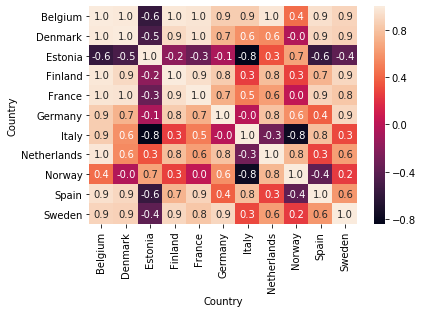

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".1f")
#sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

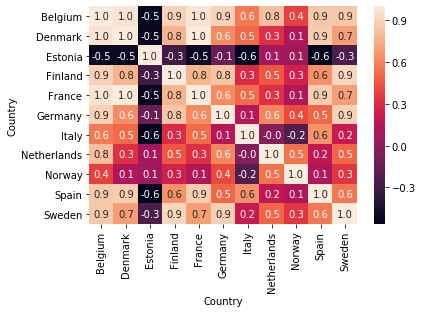

In [247]:
sns.heatmap(df.corr(method='kendall'), annot=True, fmt=".1f")
#sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

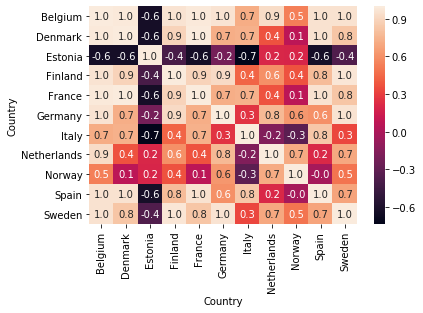

In [249]:
sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".1f")
#sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [222]:
df.describe()

Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.590603,1.580363,1.517827,1.470687,1.460597,1.439137,1.443913,1.409344,1.356280,1.293186,1.270477,1.509930,1.493667,1.498743
std,0.541383,0.512961,0.529518,0.482010,0.438833,0.440646,0.405011,0.498413,0.495776,0.518340,0.529322,0.519106,0.519701,0.507959
min,1.181260,1.183470,1.093570,1.097370,1.104310,1.047990,1.096910,0.952353,0.885129,0.818227,0.756212,1.115740,1.107670,1.117430
25%,1.283680,1.290755,1.221110,1.198605,1.215505,1.200440,1.221400,1.143617,1.097685,1.016738,0.998881,1.215850,1.198205,1.210430
50%,1.386100,1.398040,1.348650,1.299840,1.326700,1.352890,1.345890,1.334880,1.310240,1.215250,1.241550,1.315960,1.288740,1.303430
75%,1.795275,1.778810,1.729955,1.657345,1.638740,1.634710,1.617415,1.637840,1.591855,1.530665,1.527610,1.707025,1.686665,1.689400
max,2.204450,2.159580,2.111260,2.014850,1.950780,1.916530,1.888940,1.940800,1.873470,1.846080,1.813670,2.098090,2.084590,2.075370


In [157]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                  "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                          "large"],
                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
print(df)
table = pd.pivot_table(df, values='D', index=['A'], columns=['E'])
table.to_dict

     A    B      C  D  E
0  foo  one  small  1  2
1  foo  one  large  2  4
2  foo  one  large  2  5
3  foo  two  small  3  5
4  foo  two  small  3  6
5  bar  one  large  4  6
6  bar  one  small  5  8
7  bar  two  small  6  9
8  bar  two  large  7  9


<bound method DataFrame.to_dict of E      2    4    5    6    8    9
A                                
bar  NaN  NaN  NaN  4.0  5.0  6.5
foo  1.0  2.0  2.5  3.0  NaN  NaN>

In [182]:
dir_data = '~/kernel/thesis/data/cbm/'
name_csv = 'cbm_transaction.csv'
df = pd.read_csv(dir_data + name_csv)
print(df.head())
df.pivot_table()

   Transaction_id Transaction_date                                   ac_name  \
0               1       2013-04-26                Immobilaire Effetti S.R.L.   
1               1       2013-04-26                Immobilaire Effetti S.R.L.   
2               1       2013-04-26                Immobilaire Effetti S.R.L.   
3               1       2013-04-26                Immobilaire Effetti S.R.L.   
4               2       2017-10-24  ABN AMRO Commercial Finance Holding B.V.   

  ac_location ac_registration_number  \
0     Belgium            12326610156   
1       Italy            12326610156   
2     Belgium            12326610156   
3       Italy            12326610156   
4     Belgium               24263820   

                           ac_name_of_group                          mc_name  \
0                Immobilaire Effetti S.R.L.                    Luforden B.V.   
1                Immobilaire Effetti S.R.L.                    Luforden B.V.   
2                Immobilaire Effetti S